In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.metrics import silhouette_score

In [342]:
df = pd.read_csv('data.csv')
df

,PSurf_Autumn,PSurf_Spring,PSurf_Summer,PSurf_Winter,Rainf_Autumn,Rainf_Spring,Rainf_Summer,Rainf_Winter,Snowf_Autumn,Snowf_Spring,...,silt % topsoil,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,N % subsoil,CEC topsoil,CaCO3 % topsoil,C/N topsoil
0,0.651271,0.640651,0.639846,0.662522,0.461928,0.551354,0.553272,0.550900,0.0,1.199759e-08,...,0.497844,0.542537,0.645066,0.557730,0.423372,0.347541,0.248120,0.602114,0.186310,0.509915
1,0.644339,0.633150,0.631930,0.656184,0.490363,0.695905,0.445368,0.629107,0.0,0.000000e+00,...,0.427986,0.453912,0.740795,0.451649,0.331418,0.327869,0.108486,0.455532,0.624464,0.550385
2,0.608045,0.596204,0.594052,0.619880,0.406324,0.585059,0.638056,0.669368,0.0,0.000000e+00,...,0.427986,0.453912,0.740795,0.451649,0.331418,0.327869,0.108486,0.455532,0.624464,0.550385
3,0.647045,0.634850,0.631803,0.659797,0.453268,0.532347,0.489054,0.362207,0.0,0.000000e+00,...,0.436179,0.615022,0.670103,0.680627,0.555555,0.675410,0.516649,0.505708,0.291988,0.550385
4,0.687171,0.676204,0.674842,0.699069,0.538057,0.710999,0.322815,0.215000,0.0,0.000000e+00,...,0.436179,0.615022,0.670103,0.680627,0.555555,0.675410,0.516649,0.505708,0.291988,0.550385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0.281168,0.273145,0.267576,0.284314,0.081334,0.441183,0.308626,0.732030,0.0,0.000000e+00,...,0.479086,0.730646,0.773196,0.292529,0.295019,0.491803,0.505908,0.516984,0.514325,0.485633
850,0.266920,0.259802,0.252909,0.270606,0.295022,0.573730,0.163909,0.602950,0.0,0.000000e+00,...,0.109961,0.259053,0.104566,0.430951,0.162835,0.360656,0.001074,0.186046,0.000686,0.161878
851,0.322679,0.315248,0.309660,0.327466,0.333354,0.552432,0.263711,0.670926,0.0,0.000000e+00,...,0.109961,0.259053,0.104566,0.430951,0.162835,0.360656,0.001074,0.186046,0.000686,0.161878
852,0.390727,0.382829,0.378597,0.396069,0.413955,0.678861,0.245565,0.616733,0.0,0.000000e+00,...,0.495903,0.621478,0.715758,0.230433,0.220307,0.590164,0.538131,0.383369,0.448447,0.364225


In [343]:
df.columns

Index(['PSurf_Autumn', 'PSurf_Spring', 'PSurf_Summer', 'PSurf_Winter',
       'Rainf_Autumn', 'Rainf_Spring', 'Rainf_Summer', 'Rainf_Winter',
       'Snowf_Autumn', 'Snowf_Spring', 'Snowf_Summer', 'Snowf_Winter',
       'Tair_Autumn', 'Tair_Spring', 'Tair_Summer', 'Tair_Winter',
       'Wind_Autumn', 'Wind_Spring', 'Wind_Summer', 'Wind_Winter',
       'sand % topsoil', 'silt % topsoil', 'clay % topsoil',
       'pH water topsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
       'N % subsoil', 'CEC topsoil', 'CaCO3 % topsoil', 'C/N topsoil'],
      dtype='object')

In [344]:
df = df.drop(columns= [ 'PSurf_Spring', 'PSurf_Summer', 'PSurf_Winter',
        'Rainf_Spring', 'Rainf_Summer', 'Rainf_Winter',
        'Snowf_Spring', 'Snowf_Summer', 'Snowf_Winter',
        'Tair_Spring', 'Tair_Summer', 'Tair_Winter',
        'Wind_Spring', 'Wind_Summer', 'Wind_Winter'])
df

,PSurf_Autumn,Rainf_Autumn,Snowf_Autumn,Tair_Autumn,Wind_Autumn,sand % topsoil,silt % topsoil,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,N % subsoil,CEC topsoil,CaCO3 % topsoil,C/N topsoil
0,0.651271,0.461928,0.0,0.567936,0.703351,0.443815,0.497844,0.542537,0.645066,0.557730,0.423372,0.347541,0.248120,0.602114,0.186310,0.509915
1,0.644339,0.490363,0.0,0.552692,0.751159,0.522587,0.427986,0.453912,0.740795,0.451649,0.331418,0.327869,0.108486,0.455532,0.624464,0.550385
2,0.608045,0.406324,0.0,0.509478,0.692228,0.522587,0.427986,0.453912,0.740795,0.451649,0.331418,0.327869,0.108486,0.455532,0.624464,0.550385
3,0.647045,0.453268,0.0,0.481503,0.238306,0.448974,0.436179,0.615022,0.670103,0.680627,0.555555,0.675410,0.516649,0.505708,0.291988,0.550385
4,0.687171,0.538057,0.0,0.598419,0.582625,0.448974,0.436179,0.615022,0.670103,0.680627,0.555555,0.675410,0.516649,0.505708,0.291988,0.550385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0.281168,0.081334,0.0,0.573883,0.391938,0.374481,0.479086,0.730646,0.773196,0.292529,0.295019,0.491803,0.505908,0.516984,0.514325,0.485633
850,0.266920,0.295022,0.0,0.579073,0.743946,0.162577,0.109961,0.259053,0.104566,0.430951,0.162835,0.360656,0.001074,0.186046,0.000686,0.161878
851,0.322679,0.333354,0.0,0.607046,0.351432,0.162577,0.109961,0.259053,0.104566,0.430951,0.162835,0.360656,0.001074,0.186046,0.000686,0.161878
852,0.390727,0.413955,0.0,0.622206,0.224924,0.411099,0.495903,0.621478,0.715758,0.230433,0.220307,0.590164,0.538131,0.383369,0.448447,0.364225


In [345]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Features and target split (if applicable)
X = df  # Features
df_target= pd.read_csv('target.csv')
y = df_target['Qair_Autumn']  # Target variable

# Initialize Min-Max Scaler

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 20% for testing, 80% for training
)

# Check sizes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (683, 16), X_test: (171, 16)
y_train: (683,), y_test: (171,)


In [346]:
X

,PSurf_Autumn,Rainf_Autumn,Snowf_Autumn,Tair_Autumn,Wind_Autumn,sand % topsoil,silt % topsoil,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,N % subsoil,CEC topsoil,CaCO3 % topsoil,C/N topsoil
0,0.651271,0.461928,0.0,0.567936,0.703351,0.443815,0.497844,0.542537,0.645066,0.557730,0.423372,0.347541,0.248120,0.602114,0.186310,0.509915
1,0.644339,0.490363,0.0,0.552692,0.751159,0.522587,0.427986,0.453912,0.740795,0.451649,0.331418,0.327869,0.108486,0.455532,0.624464,0.550385
2,0.608045,0.406324,0.0,0.509478,0.692228,0.522587,0.427986,0.453912,0.740795,0.451649,0.331418,0.327869,0.108486,0.455532,0.624464,0.550385
3,0.647045,0.453268,0.0,0.481503,0.238306,0.448974,0.436179,0.615022,0.670103,0.680627,0.555555,0.675410,0.516649,0.505708,0.291988,0.550385
4,0.687171,0.538057,0.0,0.598419,0.582625,0.448974,0.436179,0.615022,0.670103,0.680627,0.555555,0.675410,0.516649,0.505708,0.291988,0.550385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0.281168,0.081334,0.0,0.573883,0.391938,0.374481,0.479086,0.730646,0.773196,0.292529,0.295019,0.491803,0.505908,0.516984,0.514325,0.485633
850,0.266920,0.295022,0.0,0.579073,0.743946,0.162577,0.109961,0.259053,0.104566,0.430951,0.162835,0.360656,0.001074,0.186046,0.000686,0.161878
851,0.322679,0.333354,0.0,0.607046,0.351432,0.162577,0.109961,0.259053,0.104566,0.430951,0.162835,0.360656,0.001074,0.186046,0.000686,0.161878
852,0.390727,0.413955,0.0,0.622206,0.224924,0.411099,0.495903,0.621478,0.715758,0.230433,0.220307,0.590164,0.538131,0.383369,0.448447,0.364225


In [347]:
y

0      0.005245
1      0.005160
2      0.004982
3      0.004588
4      0.005196
         ...   
849    0.005233
850    0.005266
851    0.005509
852    0.005567
853    0.005990
Name: Qair_Autumn, Length: 854, dtype: float64

In [348]:
import pandas as pd
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        """Train the decision tree."""
        features = list(X.columns)  # Ensure features is a list
        self.tree = self._build_tree(X, y, features, 0)  # Pass depth as a positional argument

    def predict(self, X):
        """Predict the labels for a given dataset."""
        return [self._predict_single(row, self.tree) for _, row in X.iterrows()]

    def _mean_squared_error(self, y):
        """Calculate the mean squared error of the labels.""" 
        return np.mean((y - np.mean(y)) ** 2)

    def _variance_reduction(self, y, y_left, y_right):
        """Calculate the variance reduction from a split."""
        total_variance = self._mean_squared_error(y)
        left_variance = self._mean_squared_error(y_left)
        right_variance = self._mean_squared_error(y_right)
        weight_left = len(y_left) / len(y)
        weight_right = len(y_right) / len(y)
        return total_variance - (weight_left * left_variance + weight_right * right_variance)

    def _best_split(self, X, y, features):
        """Find the best split for the dataset."""
        best_gain = 0
        best_feature = None
        best_threshold = None

        for feature in features:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                left_indices = X[feature] <= threshold
                right_indices = X[feature] > threshold

                y_left = y[left_indices]
                y_right = y[right_indices]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                gain = self._variance_reduction(y, y_left, y_right)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y, features, depth):
        """Recursively build the decision tree."""
        if len(set(y)) == 1:
            return np.mean(y)  # Return the mean of y if it's all the same

        if self.max_depth is not None and depth >= self.max_depth:
            return np.mean(y)  # Return the mean if max depth is reached

        best_feature, best_threshold = self._best_split(X, y, features)

        if best_feature is None:
            return np.mean(y)  # If no good split, return the mean

        left_indices = X[best_feature] <= best_threshold
        right_indices = X[best_feature] > best_threshold
        new_features = [feature for feature in features if feature != best_feature]

        left_subtree = self._build_tree(X[left_indices], y[left_indices], new_features, depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], new_features, depth + 1)

        return {
            "feature": best_feature,
            "threshold": best_threshold,
            "left": left_subtree,
            "right": right_subtree
        }

    def _predict_single(self, row, tree):
        """Predict a single sample."""
        if not isinstance(tree, dict):
            return tree  # Return the predicted value (leaf node)

        if row[tree["feature"]] <= tree["threshold"]:
            return self._predict_single(row, tree["left"])
        else:
            return self._predict_single(row, tree["right"])

    def print_tree(self, tree=None, depth=0):
        """Print the decision tree."""
        if tree is None:
            tree = self.tree

        if not isinstance(tree, dict):
            print("  " * depth + f"Leaf: {tree}")
            return

        print("  " * depth + f"[Feature: {tree['feature']}, Threshold: {tree['threshold']}]")
        self.print_tree(tree["left"], depth + 1)
        self.print_tree(tree["right"], depth + 1)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=None, sample_size=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def _bootstrap_sample(self, X, y):
        """Generate a bootstrap sample of the dataset."""
        n_samples = len(X)
        indices = np.random.choice(n_samples, self.sample_size or n_samples, replace=True)
        return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        """Train the random forest."""
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """Predict the labels for a given dataset."""
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)


In [349]:
def evaluate_regression(y_true, y_pred):
    metrics = {
        'Mean Absolute Error (MAE)': mean_absolute_error(y_true, y_pred),
        'Mean Squared Error (MSE)': mean_squared_error(y_true, y_pred),
        'Root Mean Squared Error (RMSE)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R^2 Score': r2_score(y_true, y_pred),
    }
    return metrics


In [350]:
mine = DecisionTree(max_depth=5)   
mine.fit(X_train, y_train)
predictions = mine.predict(X_test)

In [351]:
sickit = DecisionTreeRegressor(max_depth=100)
sickit.fit(X_train, y_train) 
predictions_sickit = sickit.predict(X_test)

In [352]:
my_results = evaluate_regression(y_test , predictions)
sickit_results = evaluate_regression(y_test , predictions_sickit)

print (my_results)
print('-------------------------------------------------------------------------------')
print(sickit_results)

{'Mean Absolute Error (MAE)': 0.0004175919358910284, 'Mean Squared Error (MSE)': 3.8241942954161404e-07, 'Root Mean Squared Error (RMSE)': 0.0006184007030571796, 'R^2 Score': 0.7263020498391561}
-------------------------------------------------------------------------------
{'Mean Absolute Error (MAE)': 0.00032459560418174864, 'Mean Squared Error (MSE)': 2.5035742584622377e-07, 'Root Mean Squared Error (RMSE)': 0.0005003572981842313, 'R^2 Score': 0.8208189517363409}


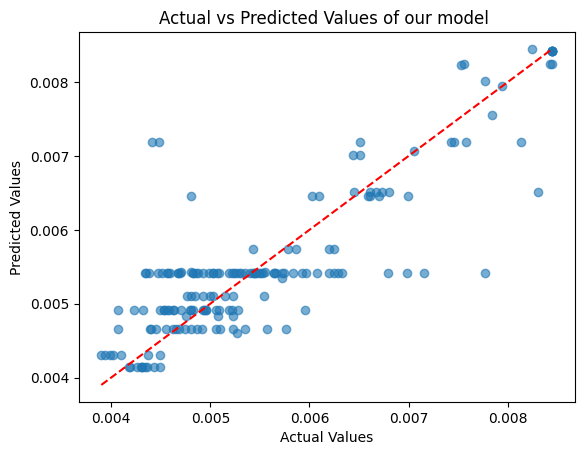

In [353]:
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted Values of our model ")
plt.show()

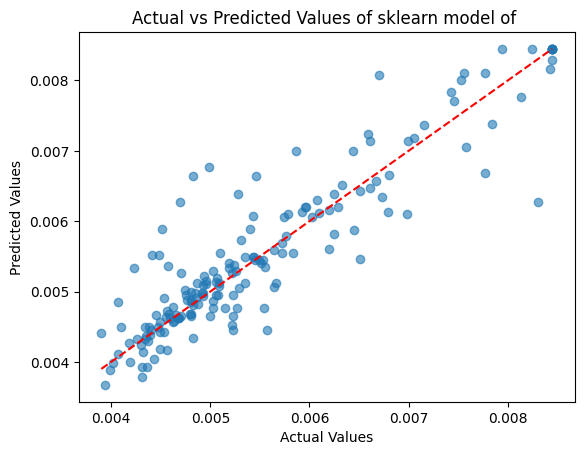

In [354]:
plt.scatter(y_test, predictions_sickit, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted Values of sklearn model of ")
plt.show()

In [355]:
mine_f = RandomForest(max_depth=15 , n_trees=50)
mine_f.fit(X_train, y_train)
predictions_f = mine_f.predict(X_test)

In [356]:
sickit_f = RandomForestRegressor(max_depth=15 , n_estimators=50 )
sickit_f.fit(X_train, y_train)
predictions_sickit_f = sickit_f.predict(X_test)

In [357]:

my_results_f = evaluate_regression(y_test , predictions_f)
sickit_results_f = evaluate_regression(y_test , predictions_sickit_f)

print (my_results_f)
print('-------------------------------------------------------------------------------')
print(sickit_results_f)

{'Mean Absolute Error (MAE)': 0.0003261821962675682, 'Mean Squared Error (MSE)': 2.3080942941096054e-07, 'Root Mean Squared Error (RMSE)': 0.00048042629966620325, 'R^2 Score': 0.8348094714139004}
-------------------------------------------------------------------------------
{'Mean Absolute Error (MAE)': 0.00025329525963374767, 'Mean Squared Error (MSE)': 1.3593770289785478e-07, 'Root Mean Squared Error (RMSE)': 0.00036869730524897353, 'R^2 Score': 0.9027092564901491}


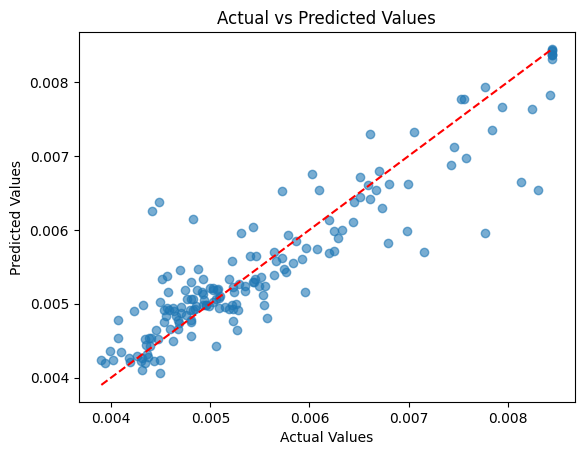

In [360]:
plt.scatter(y_test, predictions_f, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

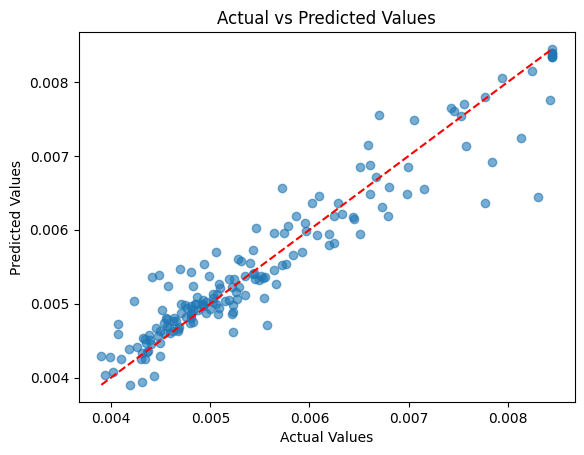

In [361]:
plt.scatter(y_test, predictions_sickit_f, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()